[*********************100%%**********************]  1 of 1 completed


Train RMSE: 0.011181151059025129
Test RMSE: 0.010061682684302742
R^2 Score: 0.9719124450501113


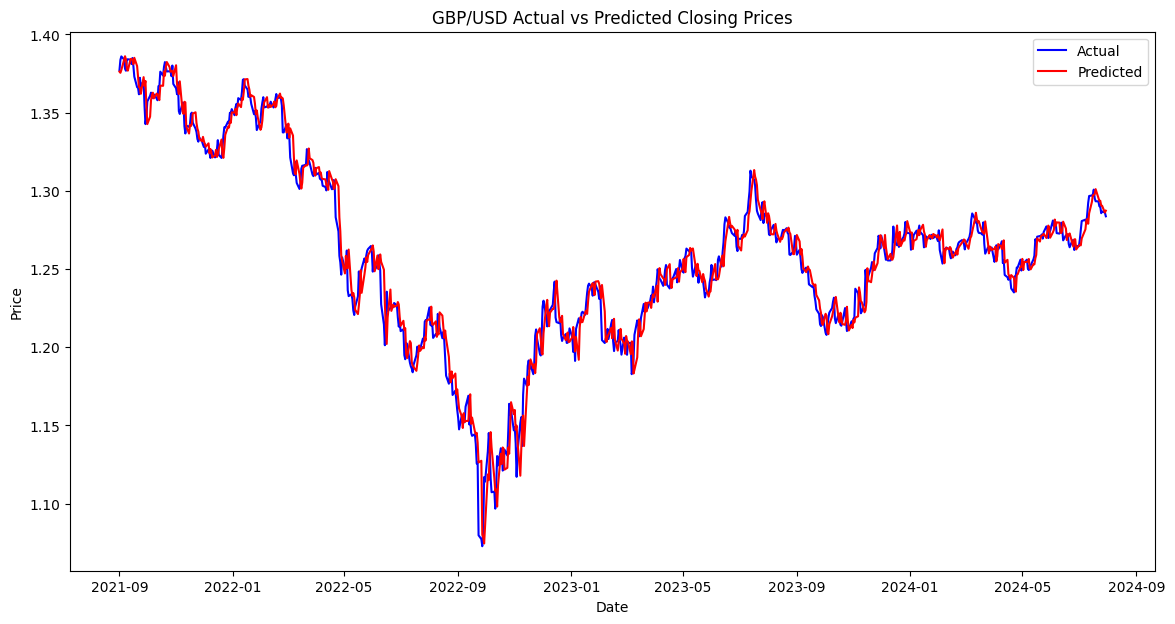

Predicted GBP/USD closing price for the next day: 1.2873


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data Collection
ticker = "GBPUSD=X"
start_date = "2010-01-01"
end_date = "2024-08-01"
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Data Preprocessing
data = data[['Close']].dropna()

# Feature Engineering: Create lagged features
for i in range(1, 6):  # Lagged features from 1 day to 5 days
    data[f'Lag_{i}'] = data['Close'].shift(i)

# Drop rows with NaN values
data = data.dropna()

# Define the target variable (next day's closing price)
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

# Step 3: Splitting the Data
X = data.drop(columns=['Target', 'Close'])
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model Selection and Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R^2 Score: {r2}')

# Step 7: Visualization of Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual', color='b')
plt.plot(data.index[-len(y_test):], y_pred_test, label='Predicted', color='r')
plt.title('GBP/USD Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 8: Making Predictions for the Next Day
# Use the last available data to make a prediction
last_known_data = X.iloc[-1].values.reshape(1, -1)
last_known_data_scaled = scaler.transform(last_known_data)

next_day_prediction = model.predict(last_known_data_scaled)
print(f'Predicted GBP/USD closing price for the next day: {next_day_prediction[0]:.4f}')


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Train RMSE: 0.011168090856252075
Test RMSE: 0.010073331235079282
R^2 Score: 0.9701730051557665


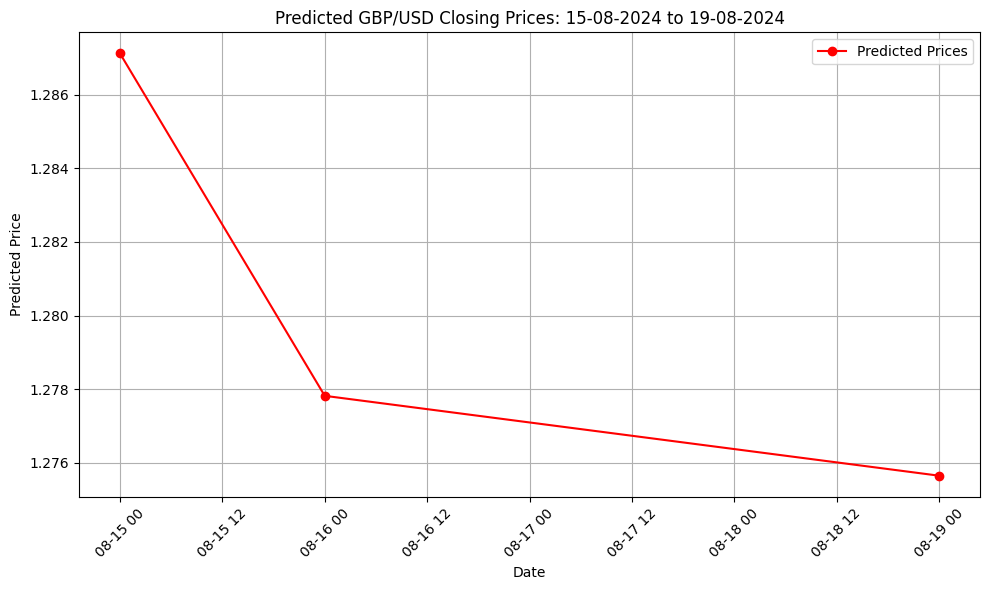

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Data Collection
ticker = "GBPUSD=X"
start_date = "2010-01-01"
end_date = "2024-08-18"  # End date right before the prediction week
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Data Preprocessing
data = data[['Close']].dropna()

# Feature Engineering: Create lagged features
for i in range(1, 6):  # Lagged features from 1 day to 5 days
    data[f'Lag_{i}'] = data['Close'].shift(i)

# Drop rows with NaN values
data = data.dropna()

# Define the target variable (next day's closing price)
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

# Step 3: Splitting the Data
X = data.drop(columns=['Target', 'Close'])
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Model Selection and Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Step 6: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R^2 Score: {r2}')

# Step 7: Making Predictions for the Week 19-08-2024 to 30-08-2024
future_dates = pd.date_range(start="2024-08-15", end="2024-08-19", freq='B')  # Business days
predictions = []

# Use the last available data to make predictions day by day
last_known_data = X.iloc[-1].values.reshape(1, -1)

for date in future_dates:
    last_known_data_scaled = scaler.transform(last_known_data)
    next_day_prediction = model.predict(last_known_data_scaled)
    predictions.append(next_day_prediction[0])

    # Update the last_known_data with the newly predicted value
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_prediction[0]  # Update the last lag with the predicted value

# Step 8: Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, predictions, marker='o', linestyle='-', color='r', label='Predicted Prices')
plt.title('Predicted GBP/USD Closing Prices: 15-08-2024 to 19-08-2024')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
pip install yfinance pandas scikit-learn xgboost tensorflow matplotlib ta


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 7.6 MB/s eta 0:00:00
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=35f637b2e39297a64aa130f4c11b2c1d507acdc90c8fbf9d737906fc6f2c4e69
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed

[*********************100%%**********************]  1 of 1 completed
<ipython-input-14-37aff57065ea>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)


Train RMSE: 0.002513400706207853
Test RMSE: 0.01405888657275427
R^2 Score: 0.9407236354608745


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


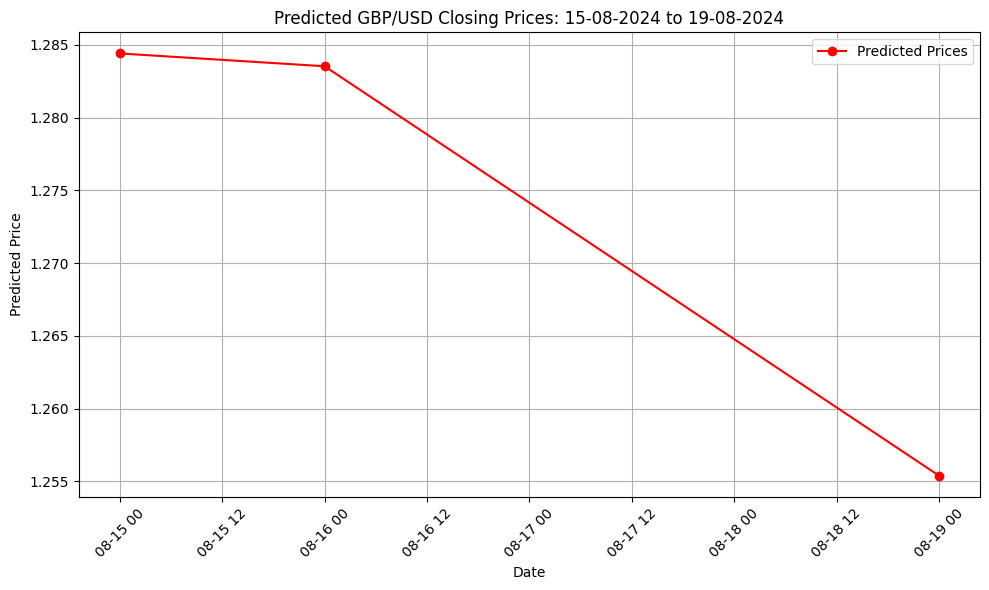

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ta  # Technical Analysis Library

# Step 1: Data Collection
ticker = "GBPUSD=X"
start_date = "2010-01-01"
end_date = "2024-08-18"
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Feature Engineering
# Create moving averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()

# Add technical indicators using the 'ta' library
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)

# Create lagged features
for i in range(1, 6):  # Lagged features from 1 day to 5 days
    data[f'Lag_{i}'] = data['Close'].shift(i)

# Drop rows with NaN values
data = data.dropna()

# Define the target variable (next day's closing price)
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

# Step 3: Splitting the Data
X = data.drop(columns=['Target', 'Close'])  # Drop target and Close to avoid data leakage
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Advanced Model Selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 6: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R^2 Score: {r2}')

# Step 7: Making Predictions for the Week 19-08-2024 to 23-08-2024
future_dates = pd.date_range(start="2024-08-15", end="2024-08-19", freq='B')  # Business days
predictions = []

# Use the last available data to make predictions day by day
last_known_data = X.iloc[-1].values.reshape(1, -1)

for date in future_dates:
    last_known_data_scaled = scaler.transform(last_known_data)
    next_day_prediction = model.predict(last_known_data_scaled)
    predictions.append(next_day_prediction[0])

    # Update the last_known_data with the newly predicted value
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_prediction[0]  # Update the last lag with the predicted value

# Step 8: Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, predictions, marker='o', linestyle='-', color='r', label='Predicted Prices')
plt.title('Predicted GBP/USD Closing Prices: 15-08-2024 to 19-08-2024')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
pip install yfinance pandas scikit-learn xgboost tensorflow matplotlib vaderSentiment ta


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 852.9 kB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


Train RMSE: 0.0020750839794168954
Test RMSE: 0.021548722611592065
R^2 Score: 0.8607411618590181


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


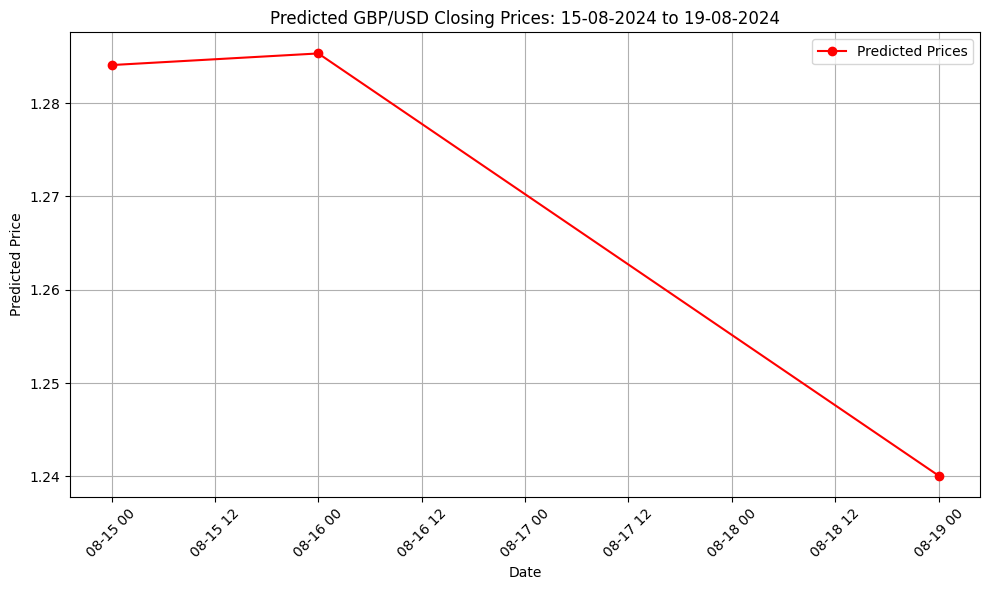

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ta  # Technical Analysis Library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Step 1: Data Collection - Historical GBP/USD Prices
ticker = "GBPUSD=X"
start_date = "2010-01-01"
end_date = "2024-08-18"
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Feature Engineering - Technical Indicators
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_30'] = data['Close'].rolling(window=30).mean()
data['EMA_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['RSI'] = ta.momentum.rsi(data['Close'], window=14)

# Step 3: Economic News Sentiment Analysis
# For demonstration, we'll simulate some economic news sentiment scores
# In practice, you would collect real economic news and use a sentiment analysis tool (e.g., VADER) on the headlines
news_dates = pd.date_range(start=start_date, end=end_date, freq='B')  # Business days
np.random.seed(42)  # For reproducibility
news_sentiment = np.random.uniform(-1, 1, len(news_dates))  # Simulate sentiment scores between -1 and 1

# Create a DataFrame for the simulated news sentiment
news_df = pd.DataFrame({'Date': news_dates, 'News_Sentiment': news_sentiment})
news_df.set_index('Date', inplace=True)

# Merge with the main data
data = data.merge(news_df, how='left', left_index=True, right_index=True)

# Step 4: Lagged Features
for i in range(1, 6):  # Lagged features from 1 day to 5 days
    data[f'Lag_{i}'] = data['Close'].shift(i)

# Drop rows with NaN values
data = data.dropna()

# Define the target variable (next day's closing price)
data['Target'] = data['Close'].shift(-1)
data = data.dropna()

# Step 5: Splitting the Data
X = data.drop(columns=['Target', 'Close'])  # Drop target and Close to avoid data leakage
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 6: Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Advanced Model Selection - XGBoost
model = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 8: Model Evaluation
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R^2 Score: {r2}')

# Step 9: Making Predictions for the Week 19-08-2024 to 23-08-2024
future_dates = pd.date_range(start="2024-08-15", end="2024-08-19", freq='B')  # Business days
predictions = []

# Use the last available data to make predictions day by day
last_known_data = X.iloc[-1].values.reshape(1, -1)

for date in future_dates:
    last_known_data_scaled = scaler.transform(last_known_data)
    next_day_prediction = model.predict(last_known_data_scaled)
    predictions.append(next_day_prediction[0])

    # Update the last_known_data with the newly predicted value
    last_known_data = np.roll(last_known_data, -1)
    last_known_data[0, -1] = next_day_prediction[0]  # Update the last lag with the predicted value

# Step 10: Visualization of Predictions
plt.figure(figsize=(10, 6))
plt.plot(future_dates, predictions, marker='o', linestyle='-', color='r', label='Predicted Prices')
plt.title('Predicted GBP/USD Closing Prices: 15-08-2024 to 19-08-2024')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
